In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

<a id='reading'></a>
### Reading the data as a dataframe and print the first five rows

In [2]:
vehicle = pd.read_csv(r'E:\machine learning\unsupervised learning\project\vehicle.csv')
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
vehicle.shape

(846, 19)

<a id='info'></a>
### Get info of the dataframe columns and check missing values

In [4]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

<a id='o1'></a>
#### Observation 1 - Dataset shape
Dataset has 846 rows and 19 columns with missing values in several columns. Checking those..

In [5]:
vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis
Performing exploratory data analysis on the bank dataset.

In [6]:
vehicle.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
compactness,846,NaN,NaN,NaN,93.6785,8.23447,73,87,93,100,119
circularity,841,NaN,NaN,NaN,44.8288,6.15217,33,40,44,49,59
distance_circularity,842,NaN,NaN,NaN,82.1105,15.7783,40,70,80,98,112
radius_ratio,840,NaN,NaN,NaN,168.888,33.5202,104,141,167,195,333
pr.axis_aspect_ratio,844,NaN,NaN,NaN,61.6789,7.89146,47,57,61,65,138
max.length_aspect_ratio,846,NaN,NaN,NaN,8.56738,4.60122,2,7,8,10,55
scatter_ratio,845,NaN,NaN,NaN,168.902,33.2148,112,147,157,198,265
elongatedness,845,NaN,NaN,NaN,40.9337,7.81619,26,33,43,46,61
pr.axis_rectangularity,843,NaN,NaN,NaN,20.5824,2.59293,17,19,20,23,29
max.length_rectangularity,846,NaN,NaN,NaN,147.999,14.5157,118,137,146,159,188


<a id='o2'></a>
#### Observation 2 - information on the type of variable

`compactness`, `max.length_aspect_ratio`, `max.length_rectangularity`, `hollows_ratio`, `class` has no missing values, rest all features don't have any missing values. All features are of numerical types. `class` is a target variable and has three unique values.
    
<a id='o3'></a>
#### Observation 3 - Descriptive statistics for the numerical variables
Descriptive statistics for the numerical variables
* **`compactness`**: Range of Q1 to Q3 is between 87 to 100. It appears that the column is almost normally distributed.

* **`circularity`**: Range of Q1 to Q3 is 40 to 49. This column too appears to be almost normally distributed.

* **`distance_circularity`**: Range of Q1 to Q3 is 70 to 98. Mean is slightly greater than median, we can say that the column is slightly skewed towards right.

* **`radius_ratio`**: Range of Q1 to Q3 is 141 to 195. Mean is slightly greater than median, we can say that the column is slightly skewed towards right.

* **`pr.axis_aspect_ratio`**: Range of Q1 to Q3 is 57 to 65. Mean is slightly greater than median, we can say that the column is slightly skewed towards right.

* **`max.length_aspect_ratio`**: Range of Q1 to Q3 is 7 to 10. Mean is slightly greater than median, we can say that the column is slightly skewed towards right.

* **`scatter_ratio`**: Range of Q1 to Q3 is 147 to 198. Mean is greater than median, we can say that the column is skewed towards right.

* **`elongatedness`**: Range of Q1 to Q3 is 33 to 46. Mean is less than median, we can say that the column is skewed towards left.

* **`pr.axis_rectangularity`**: Range of Q1 to Q3 is 19 to 23. Mean is greater than median, we can say that the column is skewed towards right.

* **`max.length_rectangularity`**: Range of Q1 to Q3 is 137 to 159. Mean is greater than median, we can say that the column is skewed towards right.

* **`scaled_variance`**: Range of Q1 to Q3 is 167 to 217. Mean is grater than median, we can say that the column is skewed towards right.

* **`scaled_variance.1`**: Range of Q1 to Q3 is 318 to 587. Mean is greater than median, we can say that the column is skewed towards right.

* **`scaled_radius_of_gyration`**: Range of Q1 to Q3 is 149 to 198. Mean is greater than median, we can say that the column is skewed towards right.

* **`scaled_radius_of_gyration.1`**: Range of Q1 to Q3 is 67 to 75. Mean is greater than median, we can say that the column is skewed towards right.

* **`skewness_about`**: Range of Q1 to Q3 is 2 to 6. Mean is greater than median, skewed towards right.

* **`skewness_about.1`**: Range of Q1 to Q3 is 5 to 19. Mean is greater than median, skewed towards right.

* **`skewness_about.2`**: Range of Q1 to Q3 is 184 to 193. Mean is slightly greater than median, almost normally distributed.

* **`hollows_ratio`**: Range of Q1 to Q3 is 197 to 211. Mean is less than median, skewed towards left.

In [7]:
display(vehicle['class'].value_counts(), vehicle['class'].value_counts(normalize = True)*100)

car    429
bus    218
van    199
Name: class, dtype: int64

car    50.709220
bus    25.768322
van    23.522459
Name: class, dtype: float64

In [8]:
replace_struc = {'car': 3, 'bus': 2, 'van': 1}
vehicle['class'] = vehicle['class'].map(replace_struc)
del replace_struc

In [9]:
vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='median')
new_vehicles = imputer.fit_transform(vehicle.iloc[:,:-1])

<a id='o4'></a>
#### Observation 4 - Imputing missing values with median
Missing values have been imputed using sklearn's imputer function.
Replacing missing value using the median of the respective columns  

In [11]:
new_vehicles = pd.DataFrame(new_vehicles)
new_vehicles.shape

(846, 18)

In [12]:
new_vehicles = new_vehicles.rename(columns={0 : "compactness", 1 : "circularity", 2 : "distance_circularity", 3 : "radius_ratio", 4 : "pr.axis_aspect_ratio", 5 : "max.length_aspect_ratio", 6 : "scatter_ratio", 7 : "elongatedness", 8 : "pr.axis_rectangularity", 9 : "max.length_rectangularity", 10 : "scaled_variance", 11 : "scaled_variance.1", 12 : "scaled_radius_of_gyration", 13 : "scaled_radius_of_gyration.1", 14 : "skewness_about", 15 : "skewness_about.1", 16 : "skewness_about.2", 17 : "hollows_ratio"})

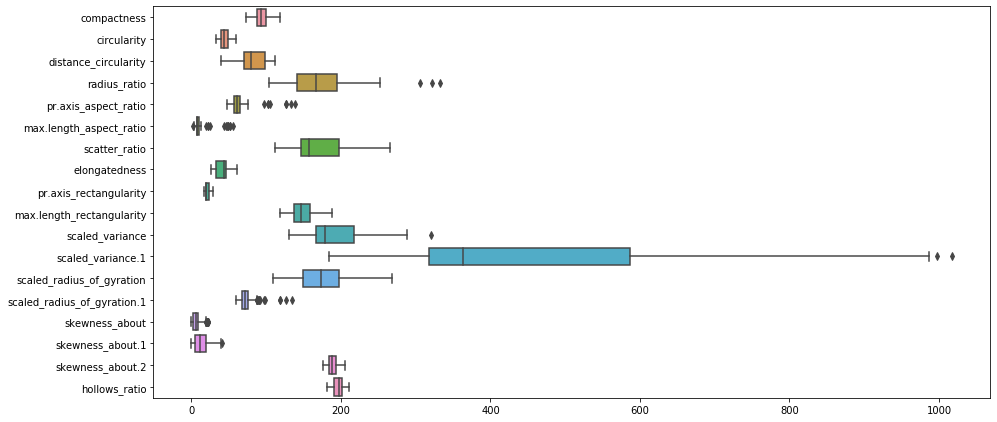

In [13]:
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = new_vehicles.iloc[:, 0:18], orient = 'h')

<a id='outlier'></a>
## Outlier removal
observation 5
* as we see in the boxplot above there are too many outliers in columns such as radius_ratio, pr.axis_aspect_ratio , max.length_aspect_ratio, etc.
* These outliers are removed and we have plotted a boxpolt again to show that these values are taken care of. Firstly we detect outliers where outliers are values that lie above quartile 3 + 1.5 time the inter quartile range or Quartile 1 - 1.5 times below the interquartile randge. we replace these values with the median. 

In [14]:
outlier_columns = ['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance', 'scaled_variance.1','scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']
for cols in outlier_columns:
    Q3 = new_vehicles[cols].quantile(0.75)
    Q1 = new_vehicles[cols].quantile(0.25)
    IQR = Q3 - Q1
    new_vehicles[cols] = np.where(new_vehicles[cols] > (Q3 + 1.5*IQR), new_vehicles[cols].quantile(0.50), new_vehicles[cols])
    new_vehicles[cols] = np.where(new_vehicles[cols] < (Q1 - 1.5*IQR), new_vehicles[cols].quantile(0.50), new_vehicles[cols])

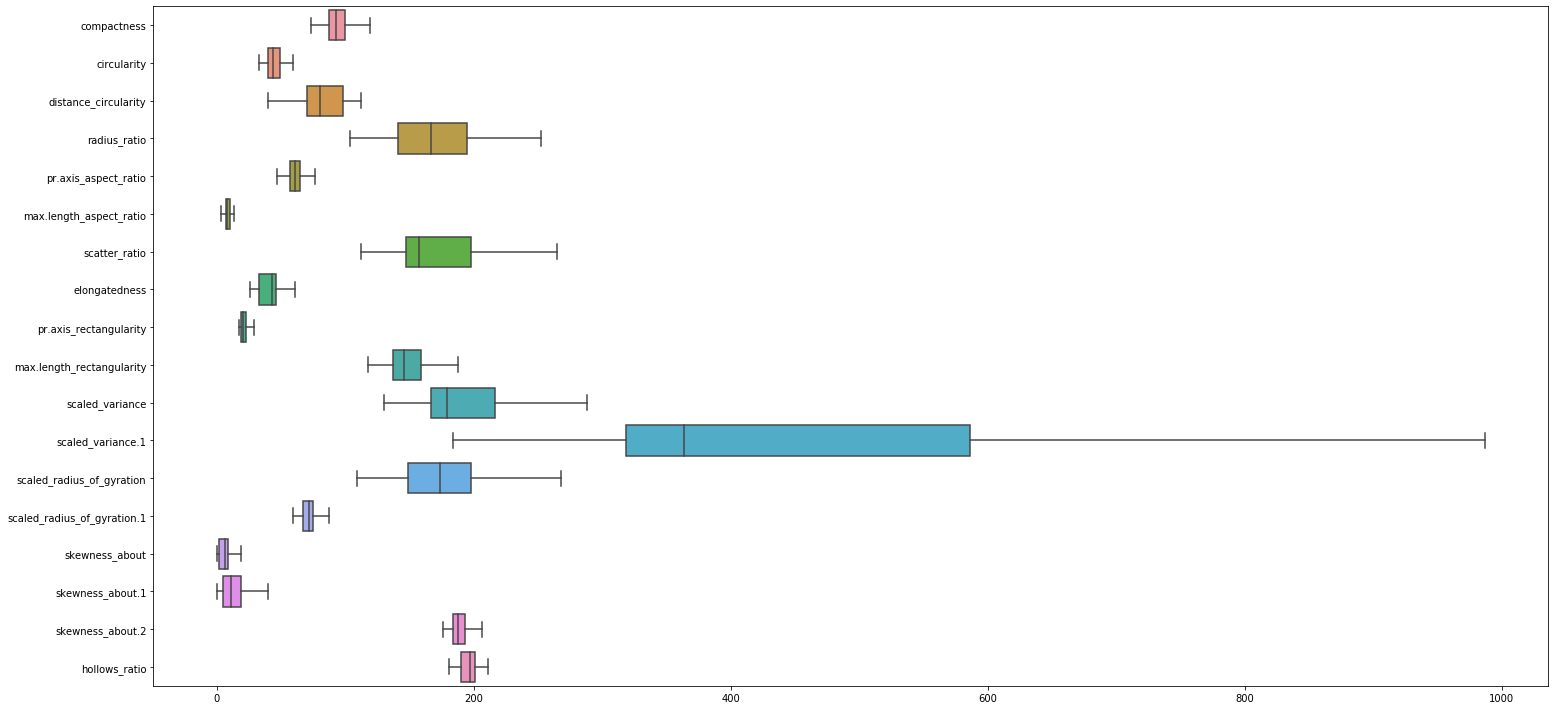

In [15]:
fig = plt.figure(figsize = (25, 12.5))
ax = sns.boxplot(data = new_vehicles.iloc[:, 0:18], orient = 'h')

<a id='o6'></a>
#### Observation 6 - Comments after checking outliers and distribution
* Used box plot for the features of the vehicle dataframe. Found that `radius_ratio`, `pr.axis_aspect_ratio`, `max.length_aspect_ratio`, `scaled_variance`, `scaled_variance.1`, `scaled_radius_of_gyration.1`, `skewness_about`, `skewness_about.1` columns has outliers. 
* Used quantile method to check outliers in these column. It appears that `scaled_radius_of_gyration.1` has maximum outliers around 15 of them, which represents about 1.77% of number of rows.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F93AF3A6C8>,
      dtype=object)

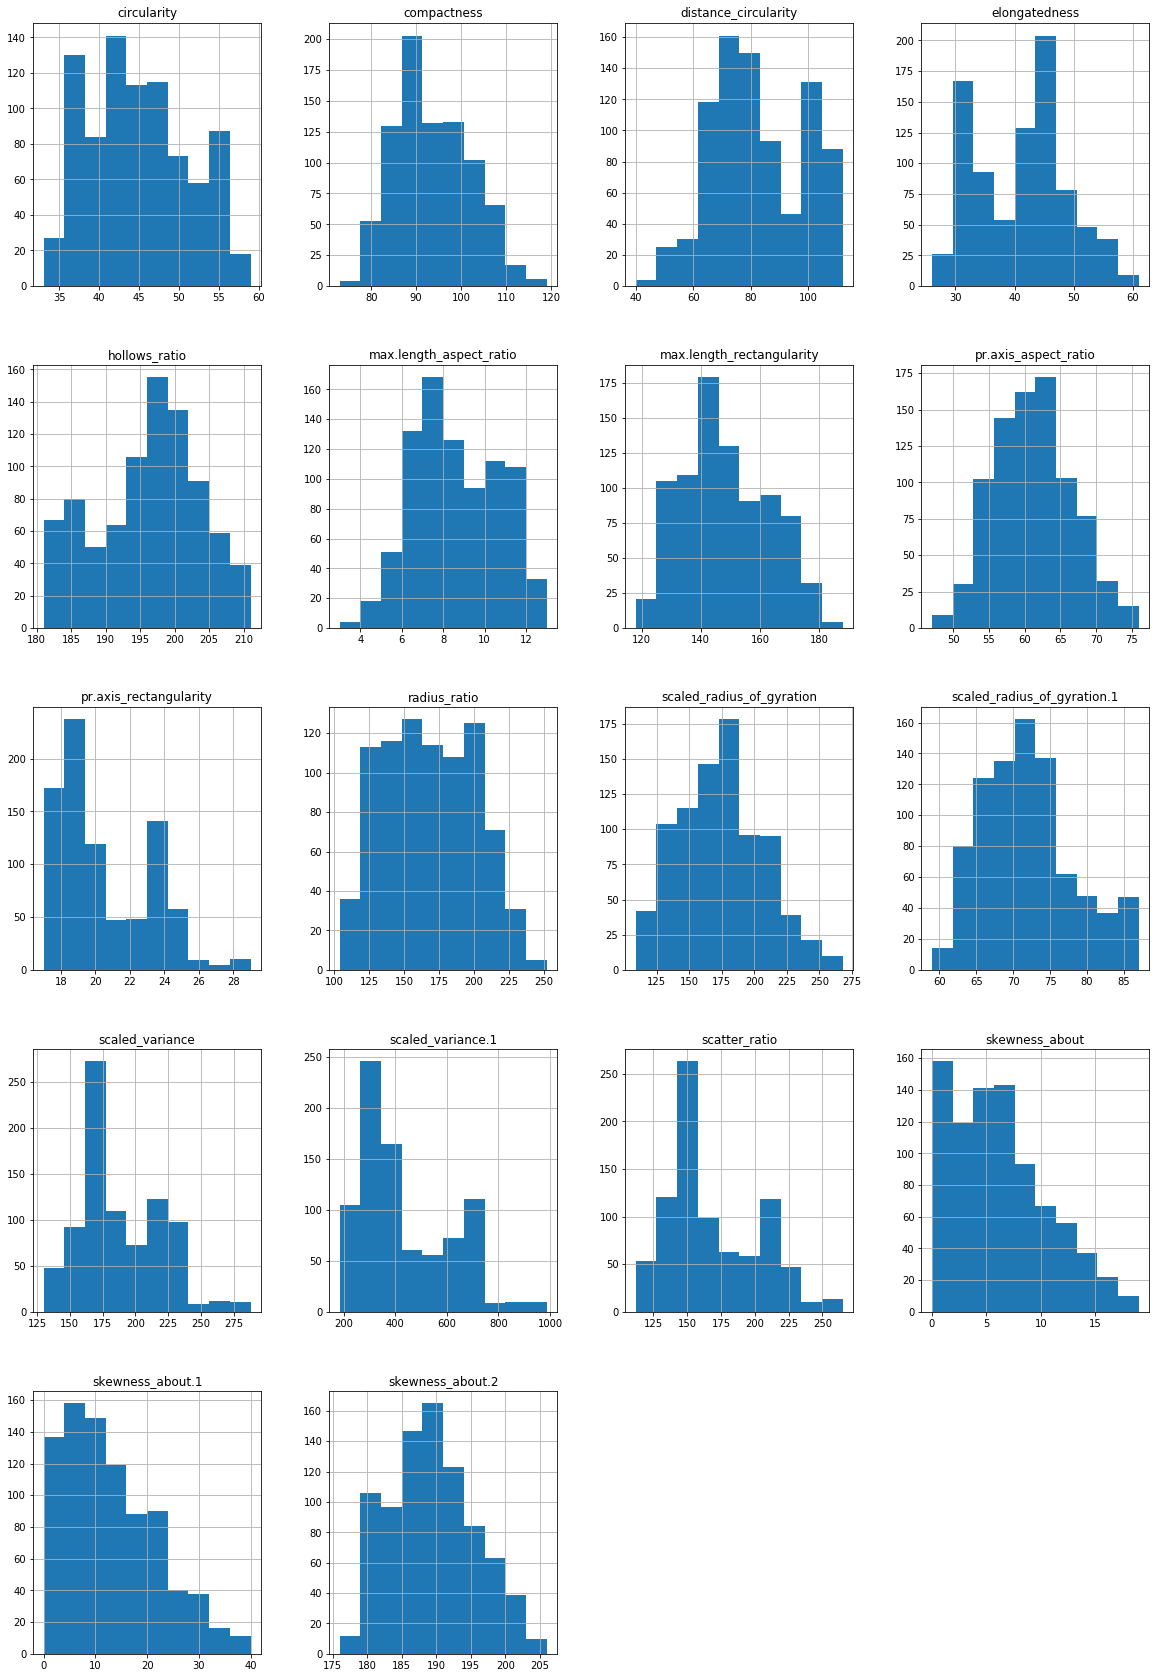

In [16]:
new_vehicles.hist(figsize=(20,30))

In [17]:
vehicle = vehicle.reset_index(drop=True)
new_vehicles = pd.concat([new_vehicles, vehicle['class']], axis=1)

Text(0.5, 1, 'Correlation Matrix of Data')

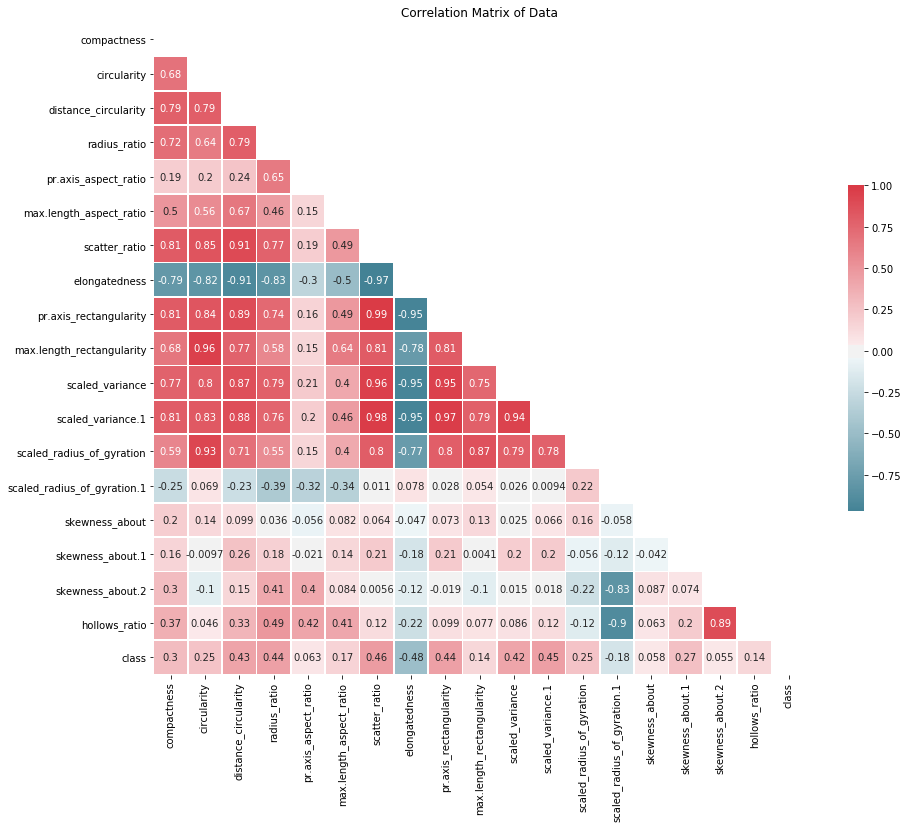

In [18]:
# Correlation matrix for all variables
corr = new_vehicles.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (15, 12))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix of Data')

In [19]:
# Absolute correlation of independent variables with the target variable
absCorrwithDep = []
allVars = new_vehicles.drop('class', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(new_vehicles['class'].corr(new_vehicles[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
7,elongatedness,0.483027
6,scatter_ratio,0.463566
11,scaled_variance.1,0.4516
8,pr.axis_rectangularity,0.444586
3,radius_ratio,0.444101
2,distance_circularity,0.428523
10,scaled_variance,0.420329
0,compactness,0.297774
15,skewness_about.1,0.269542
1,circularity,0.251281


<a id='o7'></a>
#### Observation 7 - Correlation matrix
* `scatter_ratio` and `pr.axis_rectangularity`; `scaled_variance.1` and `scatter_ratio`; `pr.axis_rectangularity` and `scaled_variance.1`; `pr.axis_rectangularity` and `scaled_variance.1`; `elongatedness` and `scatter_ratio`; `circularity` and `max.length_rectangularity`; `scaled_variance` and `scatter_ratio`; `elongatedness` and `pr.axis_rectangularity`; `elongatedness` and `scaled_variance.1`; `elongatedness` and `scaled_variance`; `pr.axis_rectangularity`, `scaled_variance` and `scaled_variance.1`; `distance_circularity` and `elongatedness`; `circularity` and `scaled_radius_of_gyration`; `distance_circularity` and `elongatedness`; `scatter_ratio` and `distance_circularity` are correlated with each other with a correlation coeff greater than 0.9.
* `elongatedness`, `scatter_ratio`, `scaled_variance.1`, `pr.axis_rectangularity` and `radius_ratio` are some columns which have relatively strong correlation with the `class` variable.
* Though multicollinearity exists between columns, some of those have a strong influence on the target variable as well. For now lets remove `max.length_rectangularity`, `scaled_variance`, `scaled_radius_of_gyration`, `distance_circularity`, `hollows_ratio` and `skewness_about.2`

In [20]:
new_vehicles.drop(['max.length_rectangularity', 'scaled_variance', 'scaled_radius_of_gyration', 
                 'distance_circularity', 'hollows_ratio', 'skewness_about.2'], axis = 1, inplace = True)

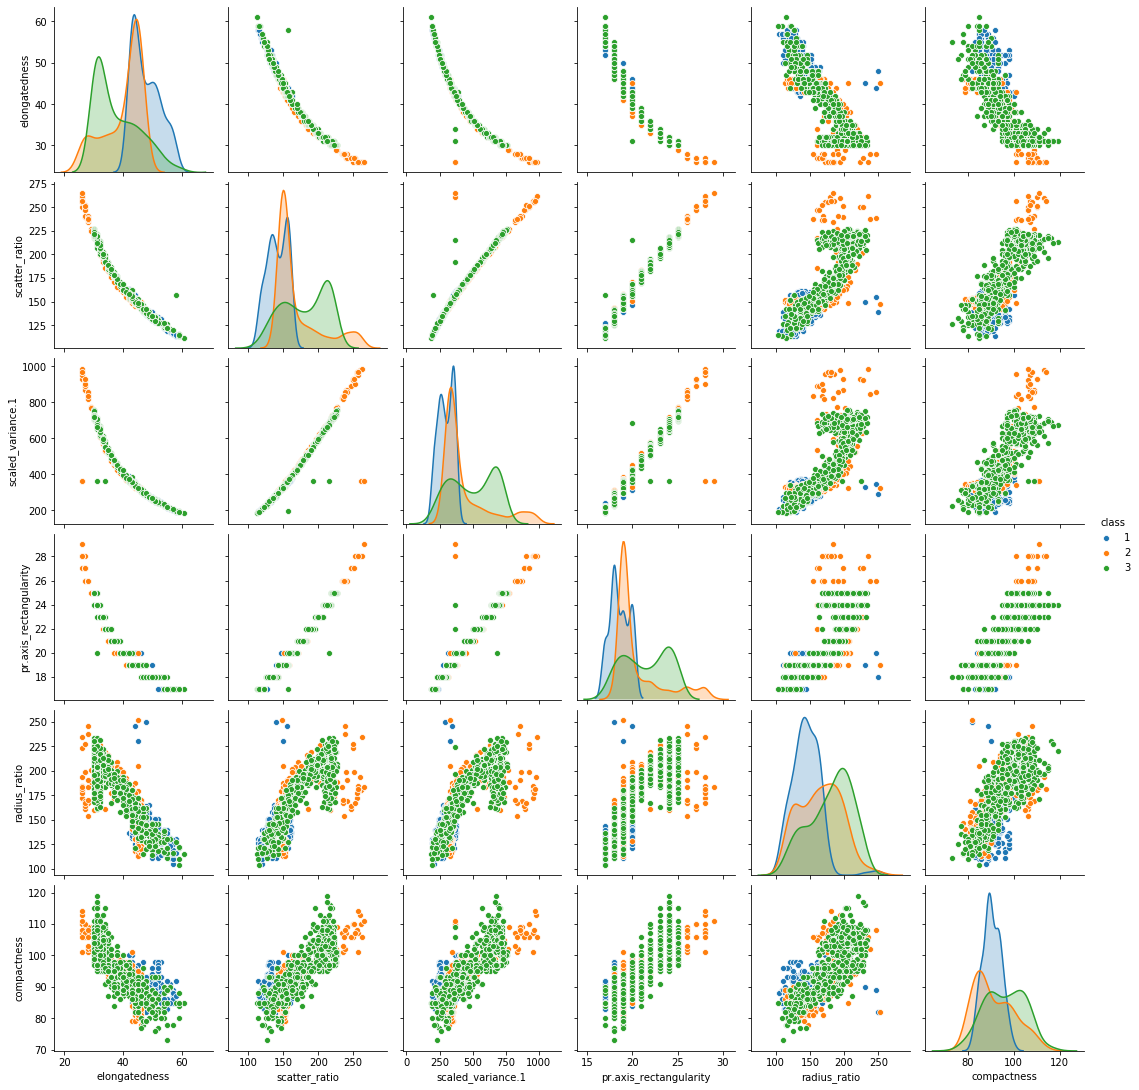

In [21]:
sns.pairplot(new_vehicles[['elongatedness', 'scatter_ratio', 'scaled_variance.1', 
             'pr.axis_rectangularity', 'radius_ratio', 'compactness', 'class']], hue = 'class')

<a id='SVM'></a>
## Training A SVM Model on original DataSet 

In [22]:
# Separating dependent and independent variables
X = new_vehicles.drop(['class'], axis = 1)
y = new_vehicles['class']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [25]:
svc_model = SVC(C= 3, kernel='linear', gamma= 1)
svc_model.fit(x_train, y_train)
prediction = svc_model .predict(x_test)

print('Support Vector Machine Classifier Scores\n\n')
print('SVM accuracy for train set: {0:.3f}'.format(svc_model.score(x_train, y_train)))
print('SVM accuracy for test set: {0:.3f}'.format(svc_model.score(x_test, y_test)))

y_true, y_pred = y_test, svc_model.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

Support Vector Machine Classifier Scores


SVM accuracy for train set: 0.914
SVM accuracy for test set: 0.906

Confusion Matrix:
 [[ 51   0   2]
 [  5  51   4]
 [ 10   3 128]]

Accuracy Score:
 0.906


In [26]:
svc_model = SVC(C= 3, kernel='rbf', gamma= 1)
svc_model.fit(x_train, y_train)
prediction = svc_model .predict(x_test)

print('Support Vector Machine Classifier with rbf kernel Scores\n\n')
print('SVM accuracy for train set: {0:.3f}'.format(svc_model.score(x_train, y_train)))
print('SVM accuracy for test set: {0:.3f}'.format(svc_model.score(x_test, y_test)))

y_true, y_pred = y_test, svc_model.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

Support Vector Machine Classifier with rbf kernel Scores


SVM accuracy for train set: 1.000
SVM accuracy for test set: 0.555

Confusion Matrix:
 [[  0   0  53]
 [  0   0  60]
 [  0   0 141]]

Accuracy Score:
 0.555


In [27]:
#Building a Support Vector Machine on train data(changing the kernel)
svc_model2  = SVC(C=3,kernel='poly',gamma = 1)
svc_model2.fit(x_train, y_train)

print('Support Vector Machine Classifier Scores\n\n')
print('SVM accuracy for train set: {0:.3f}'.format(svc_model2.score(x_train, y_train)))
print('SVM accuracy for test set: {0:.3f}'.format(svc_model2.score(x_test, y_test)))

y_true, y_pred = y_test, svc_model2.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

Support Vector Machine Classifier Scores


SVM accuracy for train set: 0.995
SVM accuracy for test set: 0.925

Confusion Matrix:
 [[ 48   1   4]
 [  2  54   4]
 [  7   1 133]]

Accuracy Score:
 0.925


<a id='SVM_hyperparameter'></a>
## Training A SVM Model with hyperparameter tuning and KFold cross validation on original DataSet 

In [28]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold


# defining parameter range 
param = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['linear', 'poly']}  

svc_model3 = SVC()
#skf = StratifiedKFold(n_splits = 10)
grid = GridSearchCV(estimator = svc_model3 , param_grid = param ,cv = 5, refit = True, n_jobs = -1) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train)

print('SVM Scores with Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', grid.best_params_)
print('Best Score is: ', grid.best_score_.round(3))

print('SVM accuracy for train set: {0:.3f}'.format(grid.score(x_train, y_train)))
print('SVM accuracy for test set: {0:.3f}'.format(grid.score(x_test, y_test)))

y_true, y_pred = y_test, grid.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

SVM Scores with Hyperparameter Tuning


Best Hyper Parameters are:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best Score is:  0.926
SVM accuracy for train set: 1.000
SVM accuracy for test set: 0.925

Confusion Matrix:
 [[ 50   1   2]
 [  3  54   3]
 [  9   1 131]]

Accuracy Score:
 0.925


<a id='PCA'></a>
## Principal component analysis

In [29]:
new_vehicles.shape

(846, 13)

In [30]:
# Creating separate variables for features and target
features = new_vehicles.iloc[:, 0:12]; features_list = list(features.columns)
target = new_vehicles['class']

features.shape, target.shape

((846, 12), (846,))

In [31]:
features.head()

,compactness,circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance.1,scaled_radius_of_gyration.1,skewness_about,skewness_about.1
0,95.0,48.0,178.0,72.0,10.0,162.0,42.0,20.0,379.0,70.0,6.0,16.0
1,91.0,41.0,141.0,57.0,9.0,149.0,45.0,19.0,330.0,72.0,9.0,14.0
2,104.0,50.0,209.0,66.0,10.0,207.0,32.0,23.0,635.0,73.0,14.0,9.0
3,93.0,41.0,159.0,63.0,9.0,144.0,46.0,19.0,309.0,63.0,6.0,10.0
4,85.0,44.0,205.0,61.0,8.0,149.0,45.0,19.0,325.0,71.5,9.0,11.0


In [32]:
# Splitting the data into training and test set in the ratio of 85:25 respectively
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, 
                                                    random_state = 0, shuffle = False)

In [35]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
y_train = y_train.values
y_test = y_test.values

display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(634, 12)

(634,)

(212, 12)

(212,)

In [36]:
# Covariance matrix
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00157978  0.6927466   0.72862246  0.19898718  0.49505746  0.81440645
  -0.78865303  0.81671979  0.81013672 -0.24048229  0.19689495  0.15222827]
 [ 0.6927466   1.00157978  0.64967972  0.21559846  0.56170726  0.8488418
  -0.82596821  0.84312815  0.83013373  0.06007584  0.11747096 -0.01374727]
 [ 0.72862246  0.64967972  1.00157978  0.6458051   0.46182824  0.77614113
  -0.82845233  0.75248537  0.76395135 -0.38539849  0.03374753  0.19228994]
 [ 0.19898718  0.21559846  0.6458051   1.00157978  0.13974833  0.19695357
  -0.29410931  0.16953522  0.19464093 -0.31137568 -0.0577624  -0.02595801]
 [ 0.49505746  0.56170726  0.46182824  0.13974833  1.00157978  0.49596454
  -0.50931992  0.49250771  0.46287686 -0.32749598  0.09188068  0.15872201]
 [ 0.81440645  0.8488418   0.77614113  0.19695357  0.49596454  1.00157978
  -0.97322484  0.99049017  0.98556499  0.00728628  0.048432    0.2125568 ]
 [-0.78865303 -0.82596821 -0.82845233 -0.29410931 -0.50931992 -0.97322484
   1.001579

In [37]:
# Eigen values and vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-3.39473131e-01 -2.41849780e-02  1.64542111e-01 -6.33245703e-02
  -1.70237731e-02  3.85179499e-01  8.01533803e-01  2.07777303e-01
  -9.57188904e-03  2.80671851e-02  1.33897879e-01 -2.04945849e-04]
 [-3.39549816e-01  1.76496259e-01 -3.15035966e-02 -1.89307544e-01
   1.58539065e-01 -2.28884382e-01 -2.50272335e-01  8.17163549e-01
  -2.29517464e-02  3.23136131e-02  2.03662436e-02 -8.26089037e-02]
 [-3.39769240e-01 -3.04850857e-01 -1.70035343e-01 -4.04000924e-02
  -1.67638705e-01  3.67060177e-02 -7.02280833e-02 -1.48036077e-01
  -1.37810636e-02  1.98013858e-02 -2.09812239e-01 -8.12513824e-01]
 [-1.32045576e-01 -5.17149075e-01 -4.66265602e-01 -2.27545849e-01
  -3.14356319e-01 -4.09893857e-01  1.86759453e-01  2.87431992e-02
   1.91340358e-02 -3.01091025e-02  2.20187118e-02  3.76356810e-01]
 [-2.36754495e-01 -1.73127585e-01  2.88826591e-01  1.78205389e-02
   6.74506451e-01 -5.19079129e-01  1.75165744e-01 -2.70194934e-01
   4.51104261e-04  2.68427853e-02 -3.39557511e-02 -1.6

In [38]:
# Cumulative variance explained
tot = sum(eig_vals)
var_exp = [(i /tot) * 100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

print('Cumulative Variance Explained', cum_var_exp)

Cumulative Variance Explained [ 54.37570082  67.27535637  76.56505316  85.51656362  91.79410625
  95.94926545  97.64995842  98.91752674  99.43319716  99.78142446
  99.95112113 100.        ]


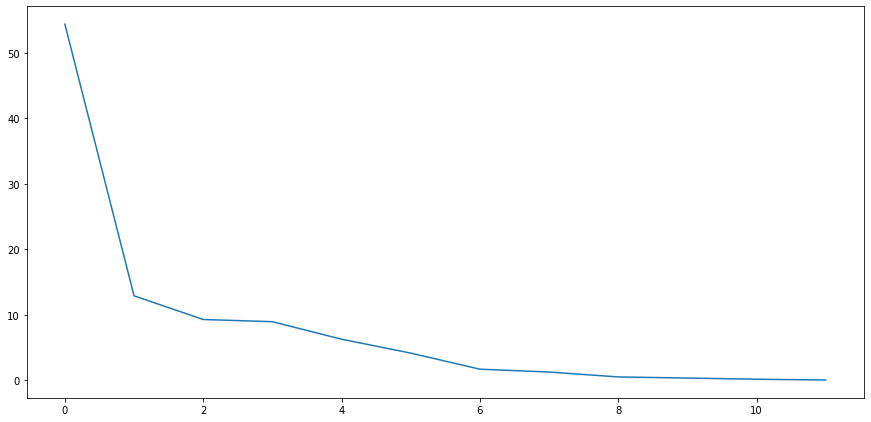

In [39]:
plt.figure(figsize = (15 , 7.2))
plt.plot(var_exp)

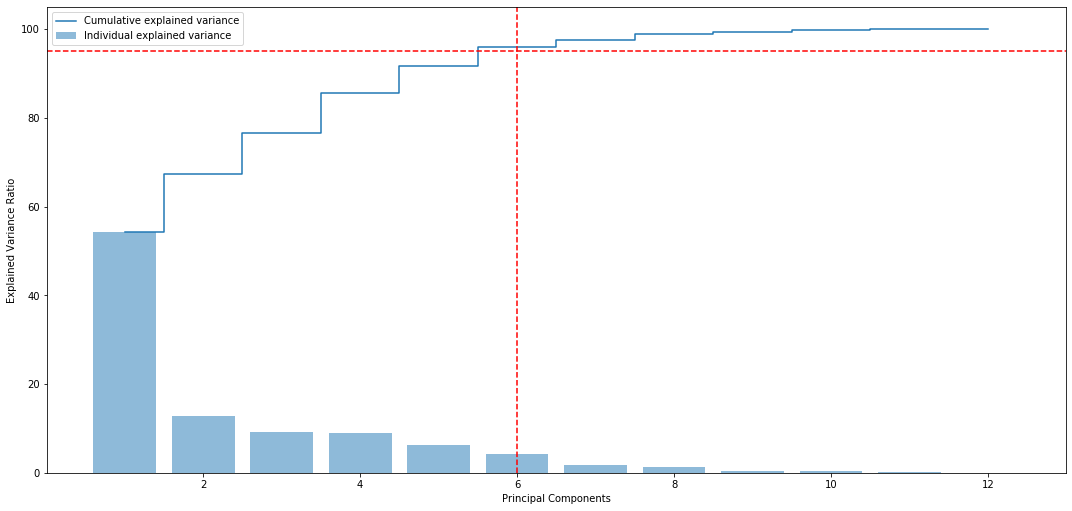

In [40]:
# Ploting 
plt.figure(figsize = (15 , 7.2))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where = 'mid', label = 'Cumulative explained variance')
plt.axhline(y = 95, color = 'r', linestyle = '--')
plt.axvline(x = 6, color = 'r', linestyle = '--')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

<a id='o9'></a>
#### Observation 8 - PCA 
* Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
* We will proceed with 6 components here which covers more than 95% of variance.

In [41]:
from sklearn.decomposition import PCA

# Reducing the dimensions from 12 to 6
pca = PCA(n_components = 6, random_state = 0)
pca.fit(X_train)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(X_test)
display(X_train_reduced.shape, X_test_reduced.shape)

(634, 6)

(212, 6)

In [42]:
pca.components_

array([[ 0.34012505,  0.33791683,  0.33502495,  0.13040716,  0.23655457,
         0.38043804, -0.38014182,  0.37575248,  0.37524814, -0.05920306,
         0.05857101,  0.08212056],
       [-0.01709809,  0.18184927, -0.325755  , -0.5460917 , -0.19779498,
         0.15585262, -0.0465937 ,  0.18101155,  0.13476807,  0.64520451,
         0.16237725,  0.05602961],
       [ 0.07033778,  0.17435392, -0.0366419 , -0.02251013,  0.13005664,
        -0.06019886,  0.04505186, -0.06180893, -0.06365375, -0.10482868,
         0.66813789, -0.68917794],
       [ 0.21198372, -0.13713506, -0.13667053, -0.38066035,  0.31577356,
        -0.06698266,  0.10647357, -0.04145665, -0.04739313, -0.36524271,
         0.44106461,  0.57029336],
       [-0.05195303, -0.13589058,  0.19447692,  0.44780171, -0.54425955,
         0.00263795, -0.0421643 , -0.01997401,  0.0276285 ,  0.17682605,
         0.54724213,  0.33253578],
       [ 0.3773311 , -0.29374402,  0.06542348, -0.36491015, -0.61236955,
         0.09327208, -

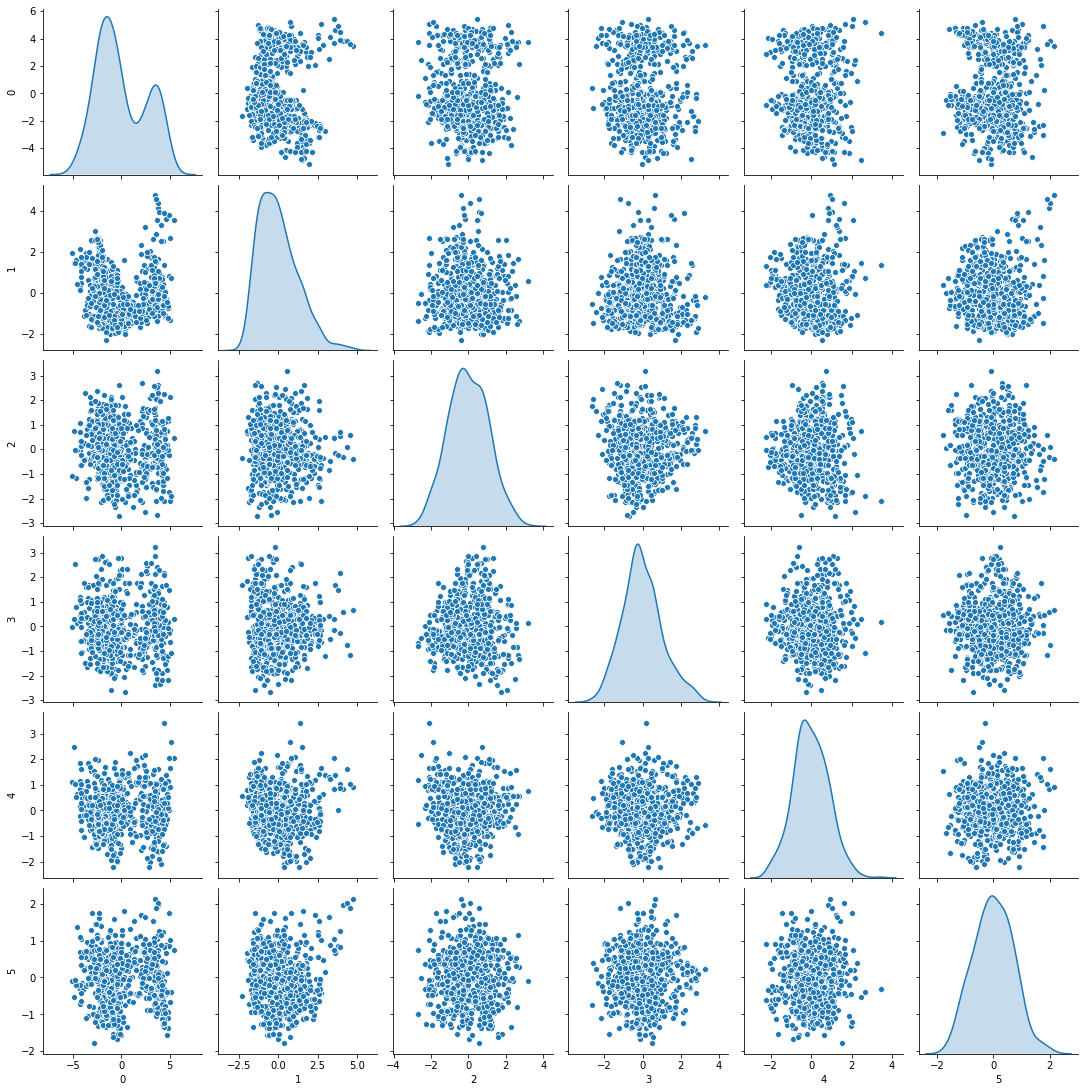

In [43]:
# Pairplot after dimension reduction
sns.pairplot(pd.DataFrame(X_train_reduced), diag_kind = 'kde')

<a id='o9'></a>
#### Observation 9 - Dimensionality Reduction 
* After dimensionality reduction using PCA our attributes have become independent with no correlation among themselves

In [44]:
# Creating a dimension reduced with features and target
df_train = pd.DataFrame(X_train_reduced).join(pd.DataFrame(y_train, columns = ['class']), how = 'left', sort = False)
df_test = pd.DataFrame(X_test_reduced).join(pd.DataFrame(y_test, columns = ['class']), how = 'left', sort = False)
df_train.shape, df_test.shape

((634, 7), (212, 7))

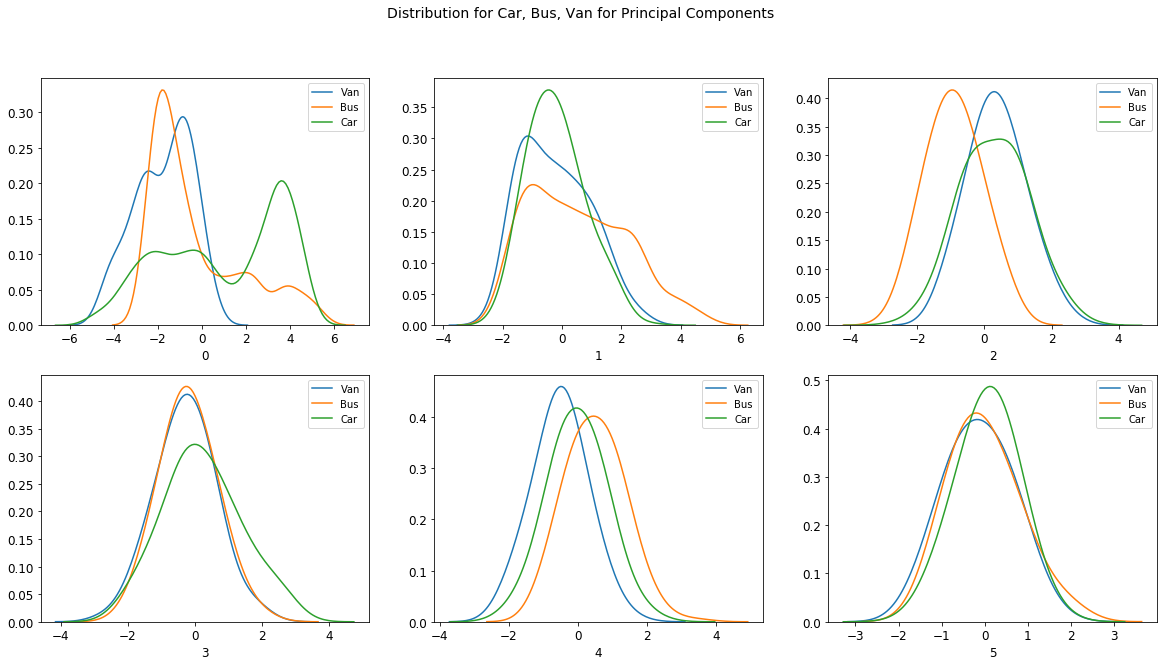

In [45]:
features = [f for f in df_train.columns if f not in ['class']]

i = 0
t1 = df_train[df_train['class'] == 1]
t2 = df_train[df_train['class'] == 2]
t3 = df_train[df_train['class'] == 3]

fig, ax = plt.subplots(2, 3, figsize = (20, 10))
fig.suptitle('Distribution for Car, Bus, Van for Principal Components', fontsize = 14)

for feature in features:
    i += 1
    plt.subplot(2, 3, i)
    sns.kdeplot(t1[feature], bw = 0.5, label = 'Van')
    sns.kdeplot(t2[feature], bw = 0.5, label = 'Bus')
    sns.kdeplot(t3[feature], bw = 0.5, label = 'Car')
    plt.xlabel(feature, fontsize = 12)
    locs, labels = plt.xticks()
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show()

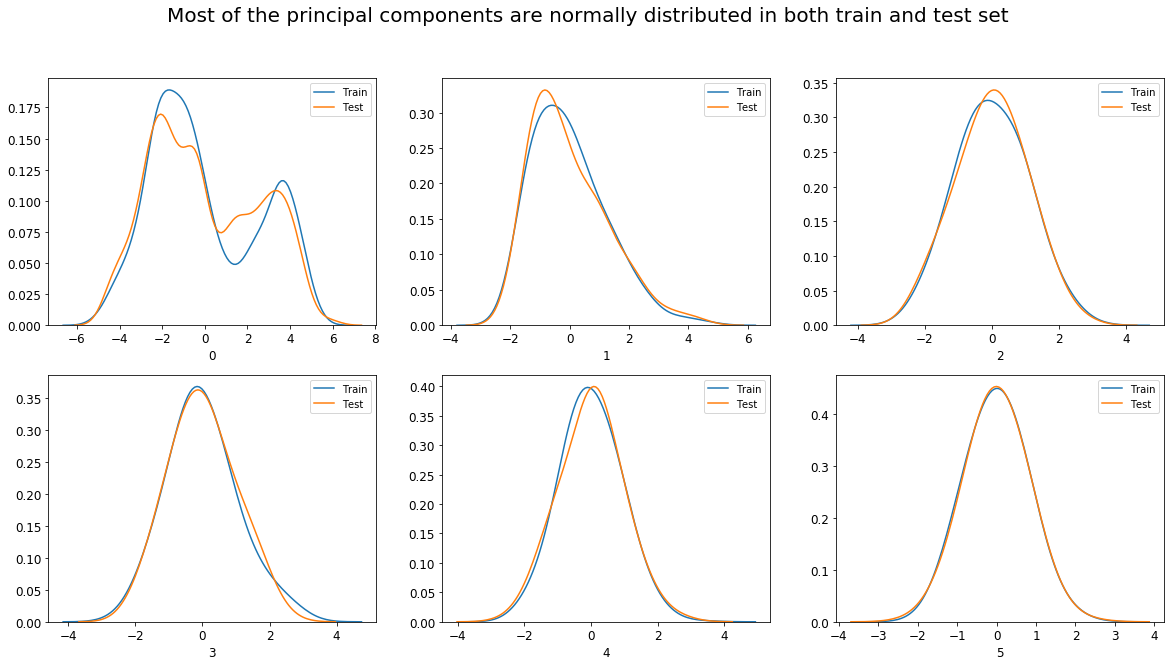

In [46]:
features = [f for f in df_train.columns if f not in ['class']]

i = 0
ttr = df_train.drop(['class'], axis = 1)
tte = df_test.drop(['class'], axis = 1)

fig, ax = plt.subplots(2, 3, figsize = (20, 10))
fig.suptitle('Most of the principal components are normally distributed in both train and test set', fontsize = 20)

for feature in features:
    i += 1
    plt.subplot(2, 3, i)
    sns.kdeplot(ttr[feature], bw = 0.5, label = 'Train')
    sns.kdeplot(tte[feature], bw = 0.5, label = 'Test')
    plt.xlabel(feature, fontsize = 12)
    locs, labels = plt.xticks()
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show();

In [47]:
svc_model = SVC(C= 3, kernel='linear', gamma= 1)
svc_model.fit(X_train_reduced, y_train)
prediction = svc_model .predict(X_test_reduced)

print('Support Vector Machine Classifier Scores\n\n')
print('SVM accuracy for train set: {0:.3f}'.format(svc_model.score(X_train_reduced, y_train)))
print('SVM accuracy for test set: {0:.3f}'.format(svc_model.score(X_test_reduced, y_test)))

y_true, y_pred = y_test, svc_model.predict(X_test_reduced)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

Support Vector Machine Classifier Scores


SVM accuracy for train set: 0.828
SVM accuracy for test set: 0.712

Confusion Matrix:
 [[38  2  9]
 [ 6 36 11]
 [12 21 77]]

Accuracy Score:
 0.712


In [48]:
svc_model = SVC(C= 3, kernel='poly', gamma= 1)
svc_model.fit(X_train_reduced, y_train)
prediction = svc_model .predict(X_test_reduced)

print('Support Vector Machine Classifier Scores\n\n')
print('SVM accuracy for train set: {0:.3f}'.format(svc_model.score(X_train_reduced, y_train)))
print('SVM accuracy for test set: {0:.3f}'.format(svc_model.score(X_test_reduced, y_test)))

y_true, y_pred = y_test, svc_model.predict(X_test_reduced)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

Support Vector Machine Classifier Scores


SVM accuracy for train set: 0.956
SVM accuracy for test set: 0.731

Confusion Matrix:
 [[39  1  9]
 [ 6 41  6]
 [16 19 75]]

Accuracy Score:
 0.731


In [49]:
svc_model = SVC(C= 3, kernel='rbf', gamma= 1)
svc_model.fit(X_train_reduced, y_train)
prediction = svc_model .predict(X_test_reduced)

print('Support Vector Machine Classifier Scores\n\n')
print('SVM accuracy for train set: {0:.3f}'.format(svc_model.score(X_train_reduced, y_train)))
print('SVM accuracy for test set: {0:.3f}'.format(svc_model.score(X_test_reduced, y_test)))

y_true, y_pred = y_test, svc_model.predict(X_test_reduced)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

Support Vector Machine Classifier Scores


SVM accuracy for train set: 0.995
SVM accuracy for test set: 0.755

Confusion Matrix:
 [[31  2 16]
 [ 4 33 16]
 [ 9  5 96]]

Accuracy Score:
 0.755


In [50]:
# SVC with hyperparameter tuning -- Principal Components

param = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['linear', 'poly', 'rbf']}  

svc = SVC()
skf = StratifiedKFold(n_splits = 10)
grid_svc = GridSearchCV(estimator = svc , param_grid = param ,cv = skf, refit = True, n_jobs = -1) 
  


grid_svc.fit(X_train_reduced, y_train)

print('SVC Scores with Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', grid_svc.best_params_)
print('Best Score is: ', grid_svc.best_score_.round(3))

print('SVC accuracy for train set: {0:.3f}'.format(grid_svc.score(X_train_reduced, y_train)))
print('SVC accuracy for test set: {0:.3f}'.format(grid_svc.score(X_test_reduced, y_test)))

y_true, y_pred = y_test, grid_svc.predict(X_test_reduced)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

SVC Scores with Hyperparameter Tuning


Best Hyper Parameters are:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score is:  0.902
SVC accuracy for train set: 0.921
SVC accuracy for test set: 0.778

Accuracy Score:
 0.778

Confusion Matrix:
 [[36  2 11]
 [ 7 41  5]
 [12 10 88]]


<a id='conclusion'></a>
### Conclusion

We used correlation matrix and checked the relation of each feature with the `class` column to reduce the number of features in the dataset to 12 from 18.

PCA being a statistical technique to <span class="mark">reduce the dimensionality</span> of the data by the selecting the most important features that captures maximum information about the dataset, does the task here. <span class="mark">Here we've reduced the dimension from 12 to 6 and selected those which explained 95% variance. Doing that it removes the correlated features as well, which we saw in the scatterplot before and after PCA.</span> 

However, some of the limitations which are clearly seen in this use case are: after implementing PCA on the dataset, we saw features getting converted into principal components. Principal components are the linear combination of original features. <span class="mark">This makes the features less interpretable.</span> Additionally, we know that one of limitation of PCA is it assumes linearity i.e. principal components are a linear combinations of the original features, which if not true will not give a sensible results.[.](https://www.quora.com/What-are-the-disadvantages-of-a-PCA)

* SVM accuracy for linear kernel train set: 0.914	;	SVM accuracy for linear kernel test set: 0.906

* SVM accuracy for rbf kernel train set: 1.000	;	SVM accuracy for rbf kernel test set: 0.555

* SVM accuracy for poly kernel train set: 0.995	;	SVM accuracy for poly kernel test set: 0.925

* SVM Scores with Hyperparameter Tuning		Best Hyper Parameters are:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}	Best Score is:  0.924	LR accuracy for train set: 1.000	LR accuracy for test set: 0.925

After PCA

* SVM accuracy for linear kernel train set: 0.828	; 	SVM accuracy for linear kernel test set: 0.712

* SVM accuracy for poly kernel train set: 0.956		;	 SVM accuracy for poly kernel test set: 0.731


* SVM accuracy for rbf kernel train set: 0.995		;	SVM accuracy for rbf kernel test set: 0.755

* SVM Scores with Hyperparameter Tuning	 Best Hyper Parameters are:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}	 Best Score is:  0.902	 SVC accuracy for train set: 0.921	 SVC accuracy for test set: 0.778

**Shape of dataset we were dealing with was 846 rows and 12 features + 1 class column. Effect of PCA can be more useful in large datasets with more features.**

Based on learning curve, we can conclude that For SVC with principal components and original features, both training and validation scores increases with the increase in size of the dataset, which would mean the scores can be further increases with more training samples. Howevver, the gap between training and validation score for SVC with principal component is higher than then the others.